In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline
from datetime import date, timedelta
import statsmodels.api as sm
sns.set_theme(style="whitegrid")
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
c = sns.color_palette("RdBu", 10)[-3]

In [5]:
def calculate_age(born):
    today = date.today()
    try: 
        birthday = born.replace(year=today.year)
    except ValueError: # raised when birth date is February 29 and the current year is not a leap year
        birthday = born.replace(year=today.year, month=born.month+1, day=1)
    if birthday > today:
        return today.year - born.year - 1
    else:
        return today.year - born.year

## Data Insight
by Jana Palanisamy

Srocket Central Pty Ltd has given us a new list of 1000 potential custoomers with their demographics and attributes. However, these customers do not have prior transaction history with the organisation.

The marketing team at Sprocket Central Pty Ltd is sure that, if correctly analysed, the data would reveal useful customer insights which could help optimise resource allocation for targeted marketing. Hence, improve performance by focusing on high value customers.

For context, Sprocket Central Pty Ltd is a long-standing KPMG client whom specializes in high-quality bikes and accessible cycling accessories to riders. Their marketing team is looking to boost business by analysing their existing customer dataset to determine customer trends and behaviour.

In building this recommendation, we need to start with a PPT which outlines the approach which we will be taking. 3 phases as follows -  Data Exploration, Model Development and Interpretation.

Prepare a detailed approach for completing the analysis including activities - i.e. understanding the data distributions, feature engineering, data transformations, modeling, results interpretation and reporting. Think detailed plan needs to be presented to the client to get a sign-off. Please advise what steps would take.

The analysis includes a detailed approach for ouor strategy behind each of the 3 phases including activities involved in each - i.e. understanding the data distributions, feature engineering, data transformations, modelling, results interpretation and reporting. This detailed plan needs to be presented to the client to get a sign-off.

- Data Exploration
- Model Development
- Interpretation


### Data Exploration
`newCustoemr` 1000 new customers without prior purchases history

### Data Wrangling
1. Uniqueness: The dataset have 1000 rows and 23 columns. Each row contains one potential customer's demographic and address infomation. 
2. Missing value: 29 on `last_name`, 17 on `DOB`, 106 on `job_title`, 165 on `job_industry_category`.
3. Validity: convert 'U' to missing value
4. Consistency


In [7]:
newCustomer_raw = pd.read_excel('/content/drive/MyDrive/Forage/KPMG_Data_Analytics_Consulting-master/data/KPMG_VI_New_raw_data_update_final.xlsx', sheet_name = 'NewCustomerList', header = 1)
newCustomer = newCustomer_raw.copy()

In [8]:
print('missing value \n', newCustomer.isnull().sum())
print('---------------')
print('\n shape', newCustomer.shape)
print('---------------')
print('Data Type', newCustomer.info())
print('---------------')
newCustomer.head(2)

missing value 
 first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Unnamed: 16                              0
Unnamed: 17                              0
Unnamed: 18                              0
Unnamed: 19                              0
Unnamed: 20                              0
Rank                                     0
Value                                 

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,0.56,0.70,0.8750,0.743750,1,1,1.71875
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,0.89,0.89,1.1125,0.945625,1,1,1.71875


In [9]:
# 1
assert newCustomer.duplicated().sum() == 0

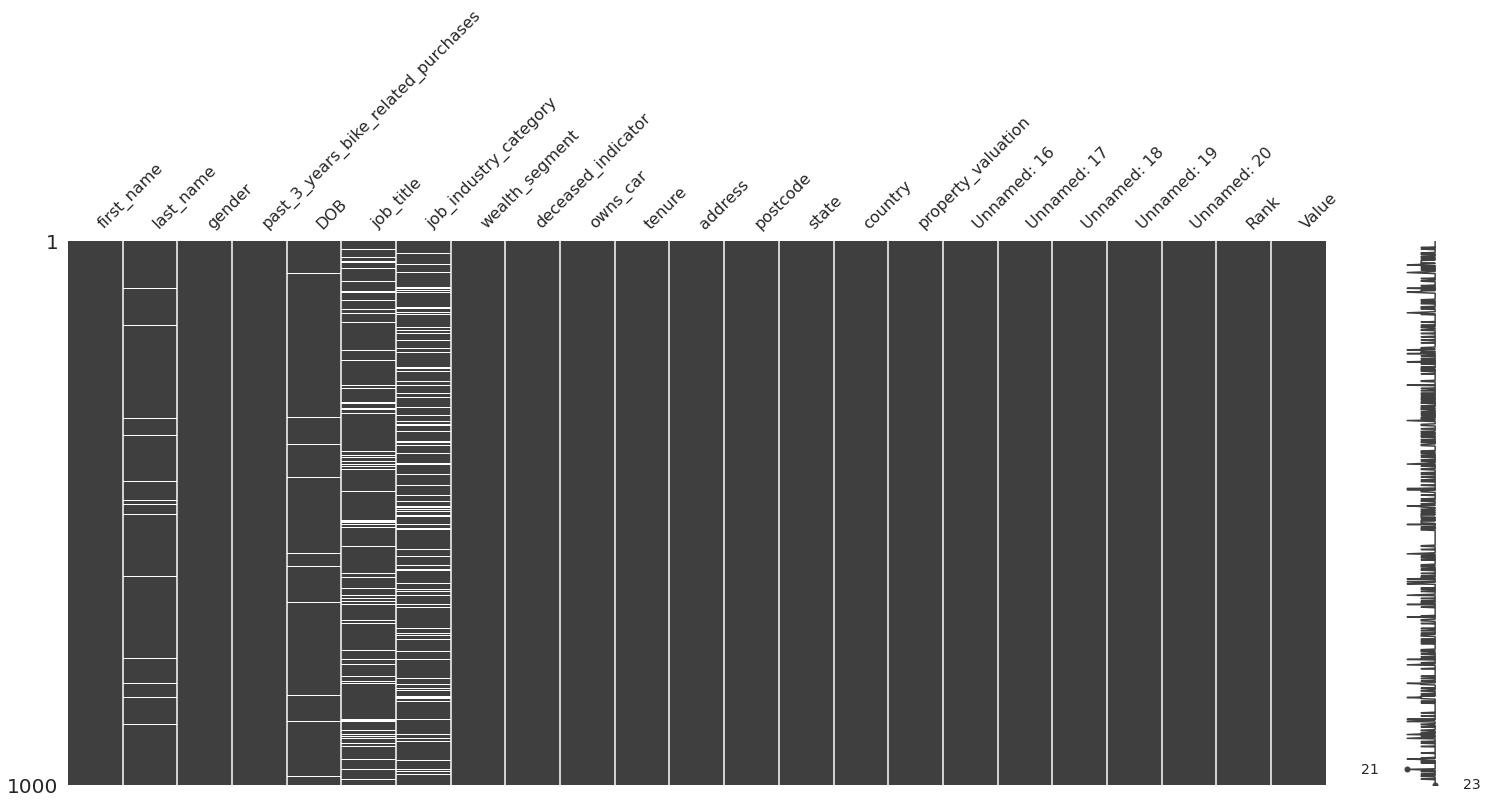

In [10]:
# 2
msno.matrix(newCustomer);

In [11]:
# 3
newCustomer['gender'] = newCustomer['gender'].replace('U', np.nan)
newCustomer['DOB'] = pd.to_datetime(newCustomer['DOB'], errors='coerce')
now = pd.to_datetime('now')
now
# Timestamp('2019-04-14 00:00:43.105892')

newCustomer['age'] = ((now - newCustomer['DOB']).astype('<m8[Y]'))
newCustomer['age_group'] = pd.cut(newCustomer.age, bins = [10, 19, 29, 39, 49, 59, 69, 79, 90])

newCustomer['bigger_age_group'] = pd.cut(newCustomer.age, bins = [10, 30, 50,  70, 90]).astype(str)

In [12]:
# 4
print(newCustomer.DOB.min(), newCustomer.DOB.max())
print('-------------------')
print(newCustomer.gender.value_counts())
#print('-------------------')
#print(newCustomer.job_title.value_counts())
print('-------------------')
print(newCustomer.job_industry_category.value_counts())
print('-------------------')
print(newCustomer.wealth_segment.value_counts())
print('-------------------')
print(newCustomer.deceased_indicator.value_counts())
print('-------------------')
print(newCustomer.owns_car.value_counts())
print('-------------------')
print(newCustomer.state.value_counts())
print('-------------------')
print(newCustomer.country.value_counts())
print('-------------------')
print(newCustomer.past_3_years_bike_related_purchases.min(), newCustomer.past_3_years_bike_related_purchases.max())

1938-06-08 00:00:00 2002-02-27 00:00:00
-------------------
Female    513
Male      470
Name: gender, dtype: int64
-------------------
Financial Services    203
Manufacturing         199
Health                152
Retail                 78
Property               64
IT                     51
Entertainment          37
Argiculture            26
Telecommunications     25
Name: job_industry_category, dtype: int64
-------------------
Mass Customer        508
High Net Worth       251
Affluent Customer    241
Name: wealth_segment, dtype: int64
-------------------
N    1000
Name: deceased_indicator, dtype: int64
-------------------
No     507
Yes    493
Name: owns_car, dtype: int64
-------------------
NSW    506
VIC    266
QLD    228
Name: state, dtype: int64
-------------------
Australia    1000
Name: country, dtype: int64
-------------------
0 99


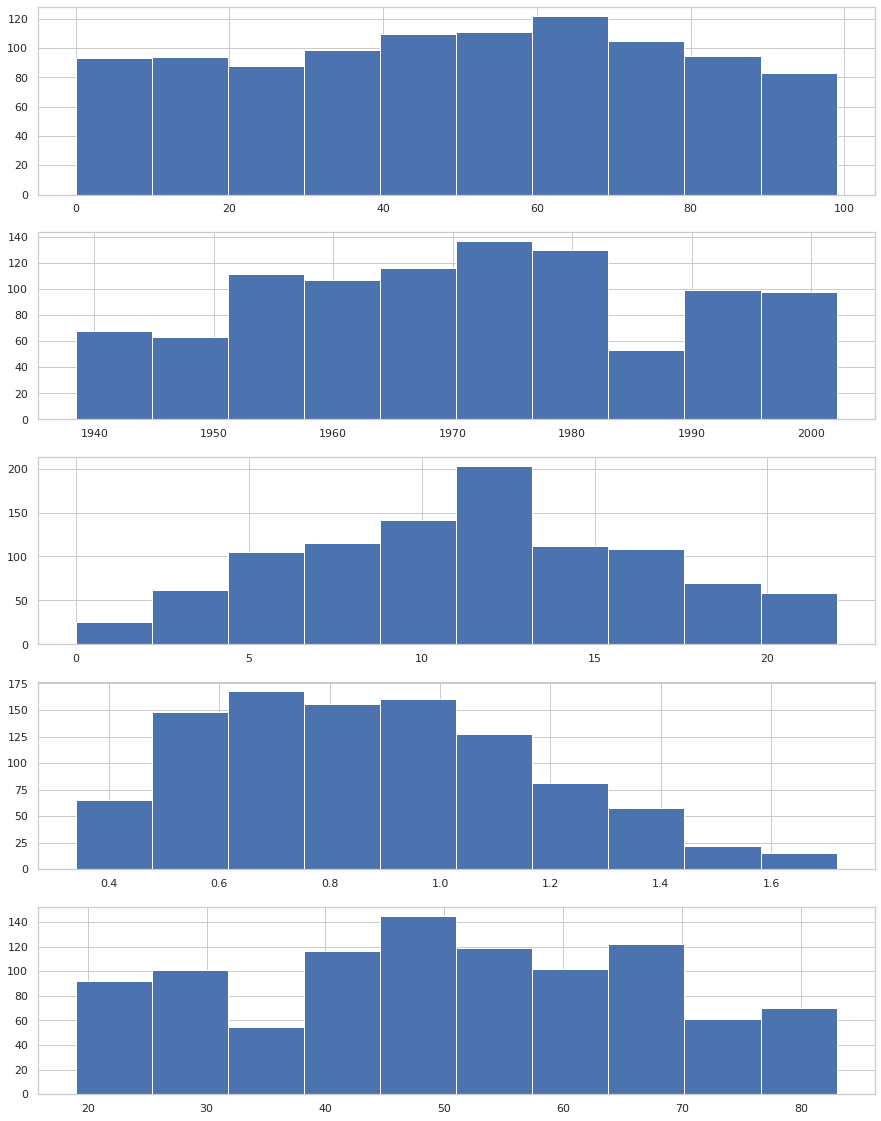

In [13]:
plt.figure(figsize = (15, 20))
plt.subplot(5,1,1)
newCustomer.past_3_years_bike_related_purchases.hist();
plt.subplot(5,1,2)
newCustomer.DOB.hist();
plt.subplot(5,1,3)
newCustomer.tenure.hist();
plt.subplot(5,1,4)
newCustomer.Value.hist();
plt.subplot(5,1,5)
newCustomer.age.hist();

In [14]:
newCustomer.state.value_counts()

NSW    506
VIC    266
QLD    228
Name: state, dtype: int64

In [15]:
newCustomer.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value,age,age_group,bigger_age_group
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,0.56,0.7000,0.8750,0.743750,1,1,1.718750,64.0,"(59, 69]","(50, 70]"
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,0.89,0.8900,1.1125,0.945625,1,1,1.718750,51.0,"(49, 59]","(50, 70]"
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1.01,1.0100,1.0100,1.010000,1,1,1.718750,47.0,"(39, 49]","(30, 50]"
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,0.87,1.0875,1.0875,1.087500,4,4,1.703125,43.0,"(39, 49]","(30, 50]"
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,0.52,0.5200,0.6500,0.650000,4,4,1.703125,56.0,"(49, 59]","(50, 70]"


In [17]:
newCustomer.to_csv('/content/drive/MyDrive/Forage/KPMG_Data_Analytics_Consulting-master/data/newCustomer.csv', index = False)

### Data Engineering
- Create calculated fields based on existing data, converting the DOB into an age bracket
- Engineering `High Margin Porduct` which may be an indicator of whether the product pruchased by the customer is in a high margin category in the past three months based on the fields `list_price` and `standard cost`
- Calculate thr distance from office to home address to as a factor in determining wheather customers may pruchase a bicycle for transportation purposes.




In [18]:
# import the data
customerDemo = pd.read_csv('/content/drive/MyDrive/Forage/KPMG_Data_Analytics_Consulting-master/data/customerDemographic.csv')
customerAddress = pd.read_csv('/content/drive/MyDrive/Forage/KPMG_Data_Analytics_Consulting-master/data/customerAddress.csv')
transaction = pd.read_csv('/content/drive/MyDrive/Forage/KPMG_Data_Analytics_Consulting-master/data/transactions.csv')

# joining dataframes
customer = customerDemo.merge(customerAddress, on = 'customer_id')

size = transaction.groupby('customer_id').size().to_frame('size').reset_index()

transaction['margin'] = transaction['list_price'] - transaction['standard_cost']

margin = transaction.groupby('customer_id')['margin'].mean().reset_index()



customer = customer.merge(size, on='customer_id').merge(margin, on='customer_id')

print(customer.columns)
customer.head()

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'default', 'owns_car', 'tenure', 'address', 'postcode', 'state',
       'country', 'property_valuation', 'size', 'margin'],
      dtype='object')


,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,address,postcode,state,country,property_valuation,size,margin
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0,060 Morning Avenue,2016,New South Wales,Australia,10,11,274.371818
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0,6 Meadow Vale Court,2153,New South Wales,Australia,10,3,742.086667
2,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0,0 Holy Cross Court,4211,QLD,Australia,9,2,110.285000
3,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0,17979 Del Mar Point,2448,New South Wales,Australia,4,6,399.156667
4,6,Curr,Duckhouse,Male,35,1966-09-16,NaN,Retail,High Net Worth,N,ðµ ð ð ð,Yes,13.0,9 Oakridge Court,3216,VIC,Australia,9,5,789.310000


In [19]:
# add age
customer['DOB'] = pd.to_datetime(customer['DOB'], errors='coerce')
now = pd.to_datetime('now')
now
# Timestamp('2019-04-14 00:00:43.105892')

customer['age'] = ((now - customer['DOB']).astype('<m8[Y]'))
customer['age_group'] = pd.cut(customer.age, bins = [10, 19, 29, 39, 49, 59, 69, 79, 90])

customer['age_group'] = customer.age_group.astype(str)

customer['bigger_age_group'] = pd.cut(customer.age, bins = [10, 30, 50,  70, 90]).astype(str)

customer.loc[customer['state'] == 'New South Wales', 'state'] = 'NSW'
customer.loc[customer['state'] == 'Victoria', 'state'] = 'VIC'

In [20]:
customer['state'].value_counts()


NSW    1866
VIC     880
QLD     743
Name: state, dtype: int64

In [22]:
customer.to_csv('/content/drive/MyDrive/Forage/KPMG_Data_Analytics_Consulting-master/data/customer.csv', index = False)
transaction.to_csv('/content/drive/MyDrive/Forage/KPMG_Data_Analytics_Consulting-master/data/transaction.csv', index = False)

In [23]:
customer.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,address,postcode,state,country,property_valuation,size,margin,age,age_group,bigger_age_group
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0,060 Morning Avenue,2016,NSW,Australia,10,11,274.371818,68.0,"(59, 69]","(50, 70]"
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0,6 Meadow Vale Court,2153,NSW,Australia,10,3,742.086667,41.0,"(39, 49]","(30, 50]"
2,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0,0 Holy Cross Court,4211,QLD,Australia,9,2,110.285000,60.0,"(59, 69]","(50, 70]"
3,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0,17979 Del Mar Point,2448,NSW,Australia,4,6,399.156667,44.0,"(39, 49]","(30, 50]"
4,6,Curr,Duckhouse,Male,35,1966-09-16,NaN,Retail,High Net Worth,N,ðµ ð ð ð,Yes,13.0,9 Oakridge Court,3216,VIC,Australia,9,5,789.310000,55.0,"(49, 59]","(50, 70]"


## Data Exploration

### Plots: Age Distribution

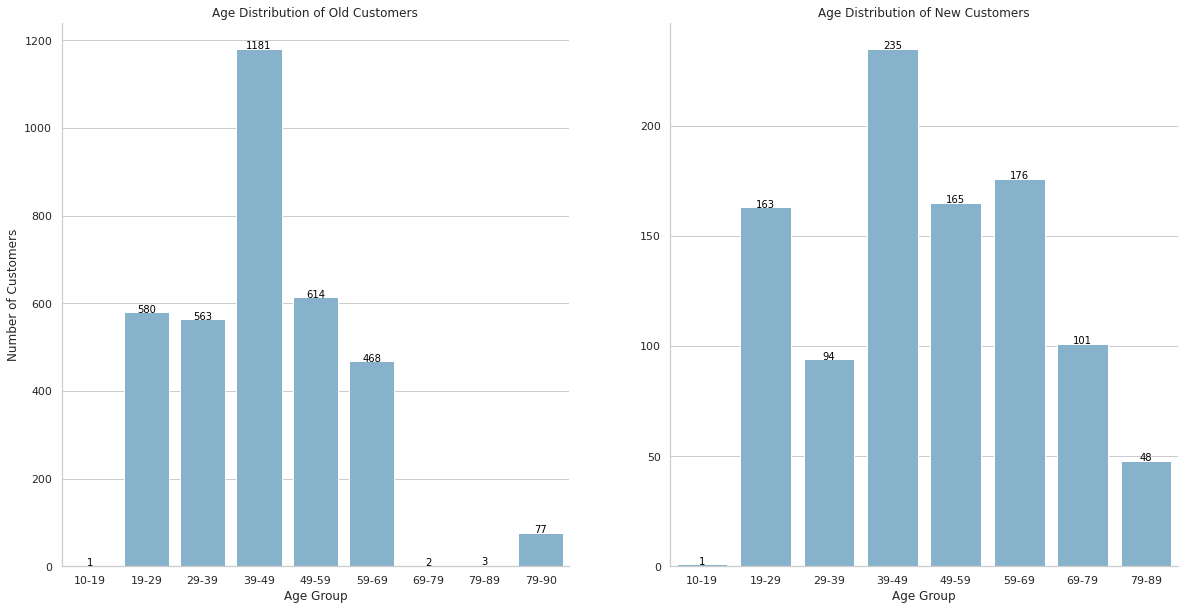

In [24]:
# age distribution

plt.figure(figsize = (20, 10))

# first plot
plt.subplot(121)

temp = customer.groupby('age_group')['customer_id'].count().reset_index()
#temp
g = sns.barplot(x = 'age_group', y = 'customer_id', data = temp, color = c);

for index, row in temp.iterrows():
    g.text(index, row.customer_id, round(row.customer_id,2), color='black', ha="center", fontsize=10)

g.set(xlabel='Age Group', ylabel='Number of Customers', title = 'Age Distribution of Old Customers')  

g.set_xticks(range(len(temp))) # <--- set the ticks first
g.set_xticklabels(['10-19','19-29','29-39','39-49','49-59','59-69','69-79','79-89', '79-90'])


# second plot
plt.subplot(122)

temp = newCustomer.groupby('age_group').size().to_frame('size').reset_index()
#temp
g = sns.barplot(x = 'age_group', y = 'size', data = temp, color = c);
#g.text(row.age_group,row.customer_id, round(row.customer_id,2), color='black', ha="center")
for index, row in temp.iterrows():
    g.text(index, row['size'], round(row['size'],2), color='black', ha="center", fontsize=10)
g.set(xlabel='Age Group', ylabel='', title = 'Age Distribution of New Customers') 

g.set_xticks(range(len(temp))) # <--- set the ticks first
g.set_xticklabels(['10-19','19-29','29-39','39-49','49-59','59-69','69-79','79-89', '79-90'])


sns.despine();

### Plots: Number of Customer by Gender

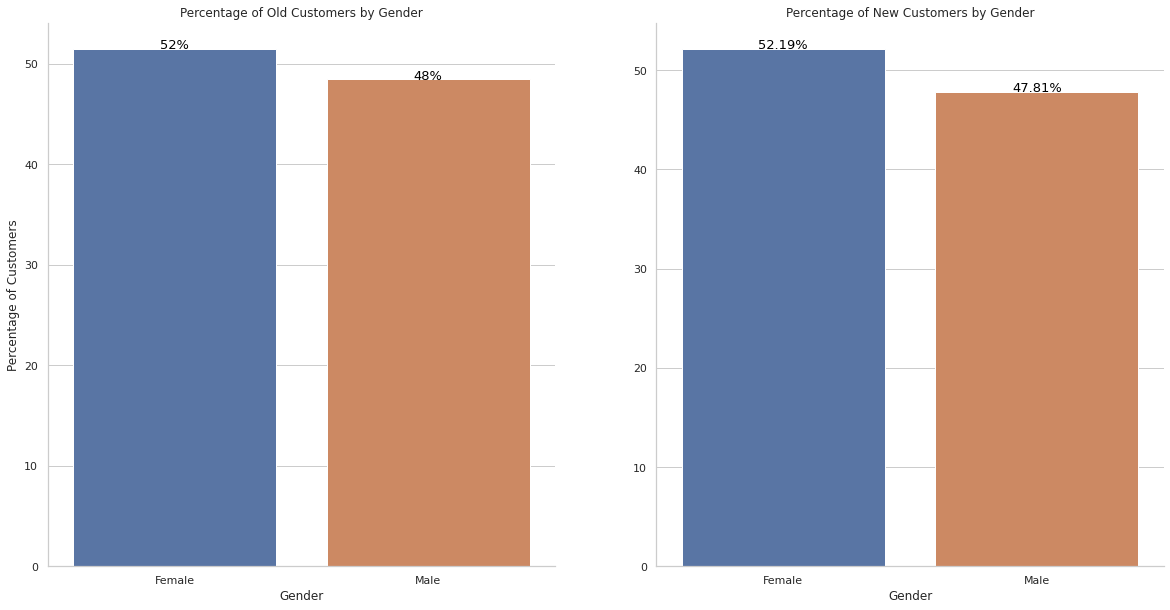

In [25]:
# Gender
#newCustomer.groupby('gender')['past_3_years_bike_related_purchases'].sum()
plt.figure(figsize = (20, 10))
# first plot
plt.subplot(121)
temp = customer\
.groupby('gender')\
.size()\
.to_frame('size')\
.apply(lambda x: 100*x/x.sum())\
.reset_index()

g = sns.barplot(x = 'gender', y = 'size', data = temp);
for index, row in temp.iterrows():
    g.text(index, row['size'], str(round(row['size']))+'%', color='black', ha="center", fontsize=13)
    
g.set(xlabel='Gender', ylabel='Percentage of Customers', title = 'Percentage of Old Customers by Gender') ;

# second plot
plt.subplot(122)

#plt.figure(figsize = (10, 10))

temp = newCustomer\
.groupby('gender')\
.size()\
.to_frame('size')\
.apply(lambda x: 100*x/x.sum())\
.reset_index()

g = sns.barplot(x = 'gender', y = 'size', data = temp);
for index, row in temp.iterrows():
    g.text(index, row['size'], str(round(row['size'],2))+'%', color='black', ha="center", fontsize=13);
g.set(xlabel='Gender', ylabel='', title = 'Percentage of New Customers by Gender') ;

sns.despine();


### Plots: Number of Purchase by Gender

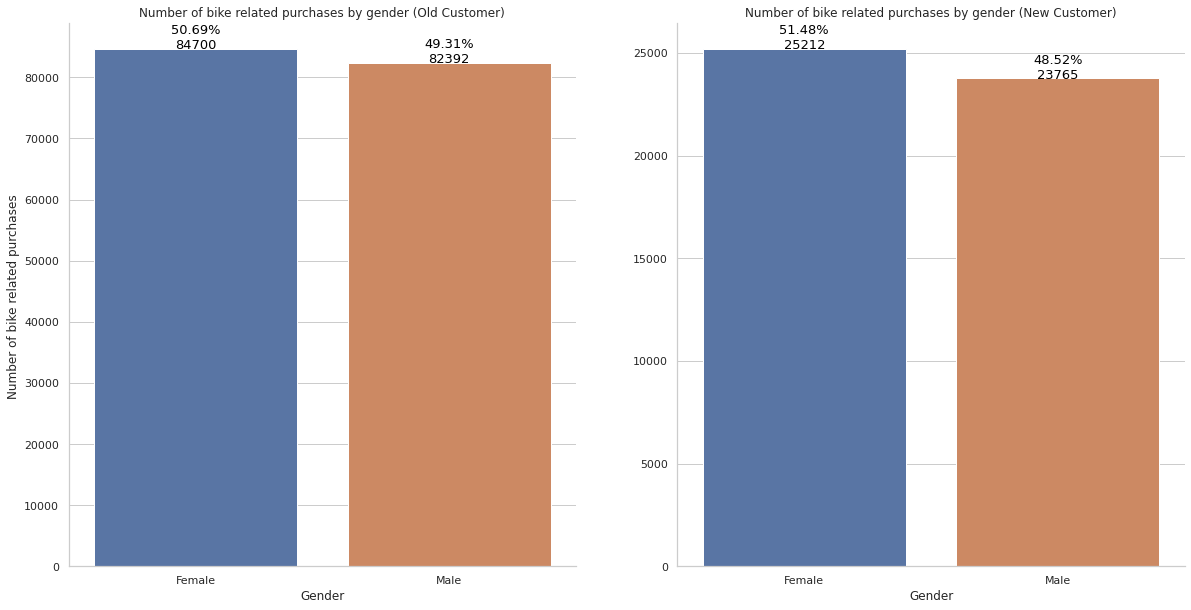

In [26]:
plt.figure(figsize = (20, 10))

# first plot
plt.subplot(121)
temp = customer\
.groupby('gender')['past_3_years_bike_related_purchases']\
.sum()\
.to_frame('sum')\
.apply(lambda x: x)\
.reset_index()

temp['percentage'] =  100 * temp['sum']  / temp['sum'].sum()

g = sns.barplot(x = 'gender', y = 'sum', data = temp);

for index, row in temp.iterrows():
    g.text(index, row['sum'], str(round(row['percentage'],2))+'%'+'\n'+str(row['sum']), color='black', ha="center", fontsize=13)
    
g.set(xlabel='Gender', ylabel='Number of bike related purchases ', title = 'Number of bike related purchases by gender (Old Customer)') ;

# second plot
plt.subplot(122)

temp = newCustomer\
.groupby('gender')['past_3_years_bike_related_purchases']\
.sum()\
.to_frame('sum')\
.apply(lambda x: x)\
.reset_index()

temp['percentage'] =  100 * temp['sum']  / temp['sum'].sum()

g = sns.barplot(x = 'gender', y = 'sum', data = temp);

for index, row in temp.iterrows():
    g.text(index, row['sum'], str(round(row['percentage'],2))+'%'+'\n'+str(row['sum']), color='black', ha="center", fontsize=13)
    
g.set(xlabel='Gender',ylabel = '', title = 'Number of bike related purchases by gender (New Customer)') ;

sns.despine();



By looking at plots, two questions raised. 
1. Is male making more bike related purchases than female?
2. Is the new cohort making more bike related purchases than female?


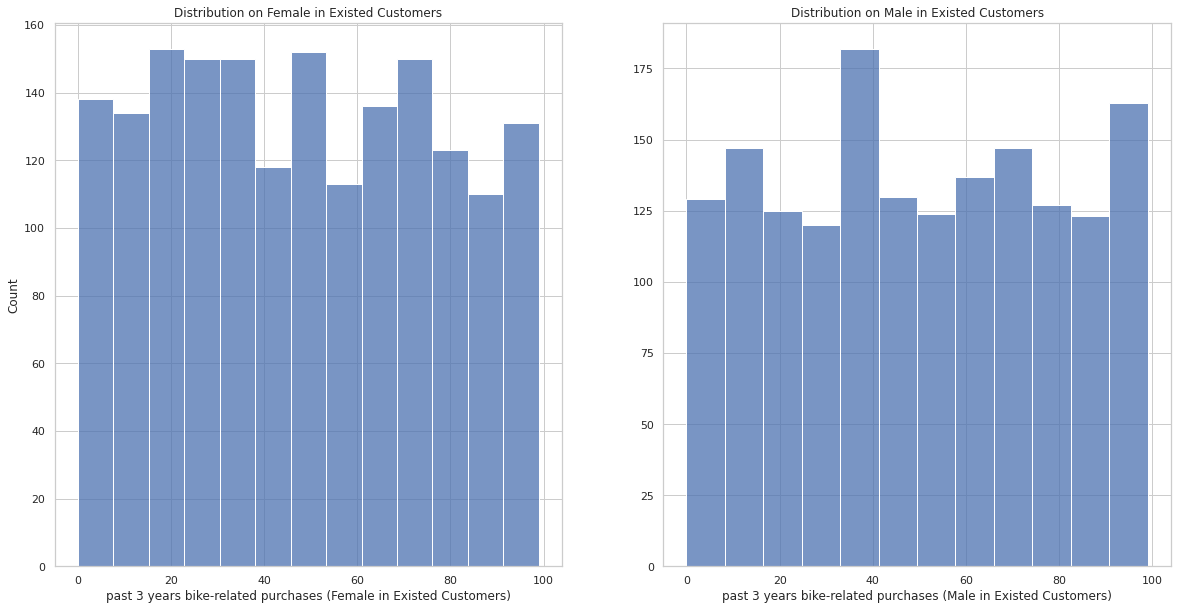

In [27]:
oldFemale_purchases = customer[customer.gender == 'Female']['past_3_years_bike_related_purchases']
oldMale_purchases = customer[customer.gender == 'Male']['past_3_years_bike_related_purchases']

plt.figure(figsize = (20, 10))
plt.subplot(121)
g = sns.histplot(oldFemale_purchases);
g.set(xlabel = 'past 3 years bike-related purchases (Female in Existed Customers)', ylabel = 'Count', title = 'Distribution on Female in Existed Customers');
plt.subplot(122)
g = sns.histplot(oldMale_purchases);
g.set(xlabel = 'past 3 years bike-related purchases (Male in Existed Customers)', ylabel = '', title = 'Distribution on Male in Existed Customers');


In [28]:
sm.stats.ttest_ind(oldFemale_purchases, oldMale_purchases)

(-1.6653215455747532, 0.09594048125189641, 3410.0)

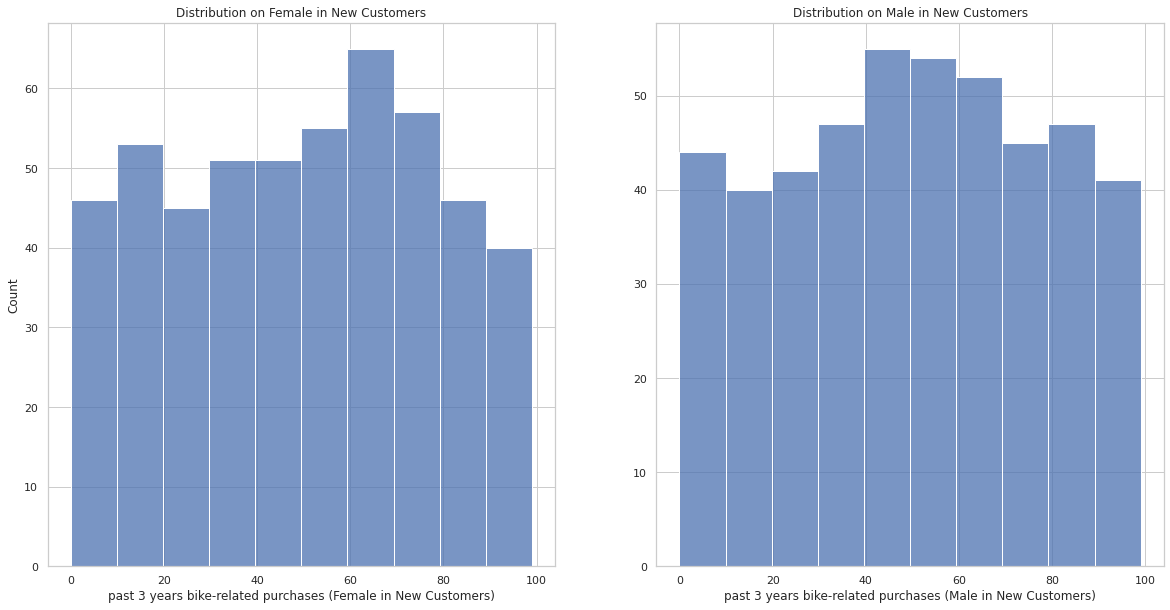

In [29]:
newFemale_purchases = newCustomer[customer.gender == 'Female']['past_3_years_bike_related_purchases']
newMale_purchases = newCustomer[customer.gender == 'Male']['past_3_years_bike_related_purchases']

plt.figure(figsize = (20, 10))
plt.subplot(121)
g = sns.histplot(newFemale_purchases);
g.set(xlabel = 'past 3 years bike-related purchases (Female in New Customers)', ylabel = 'Count', title = 'Distribution on Female in New Customers');
plt.subplot(122)
g = sns.histplot(newMale_purchases);
g.set(xlabel = 'past 3 years bike-related purchases (Male in New Customers)', ylabel = '', title = 'Distribution on Male in New Customers');


In [30]:
sm.stats.ttest_ind(newFemale_purchases, newMale_purchases)

(-0.23646075091958316, 0.8131248774559843, 974.0)

Hypothesis: 
$$H_0: \mu_{female} = \mu_{male}$$
$$H_a: \mu_{female} \neq \mu_{male}$$

Since the p-values is quite high, we cannot reject the Null hypothesis that the difference in the female group and male group is zero.

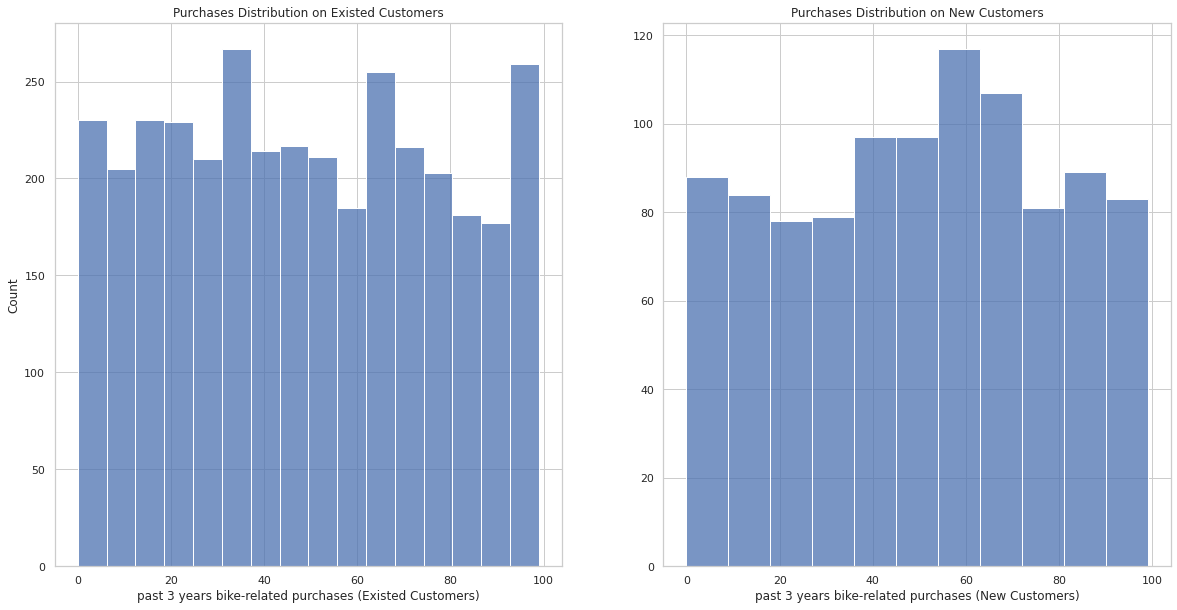

In [31]:
oldCustomer_purchases = customer['past_3_years_bike_related_purchases']
newCustomer_purchases = newCustomer['past_3_years_bike_related_purchases']

plt.figure(figsize = (20, 10))
plt.subplot(121)
g = sns.histplot(oldCustomer_purchases);
g.set(xlabel = 'past 3 years bike-related purchases (Existed Customers)', ylabel = 'Count', title = 'Purchases Distribution on Existed Customers');

plt.subplot(122)
g = sns.histplot(newCustomer_purchases);
g.set(xlabel = 'past 3 years bike-related purchases (New Customers)', ylabel = '', title = 'Purchases Distribution on New Customers');


In [32]:
sm.stats.ttest_ind(oldCustomer_purchases, newCustomer_purchases)

(-1.0199494709727301, 0.3078074142153093, 4487.0)

Hypothesis: 
$$H_0: \mu_{old} = \mu_{new}$$
$$H_a: \mu_{old} \neq \mu_{new}$$

Since the p-value (~0.348) is quite high, we cannot reject the Null hypothesis that the difference in the existed customers and new customers is zero.

### Job Industry Category

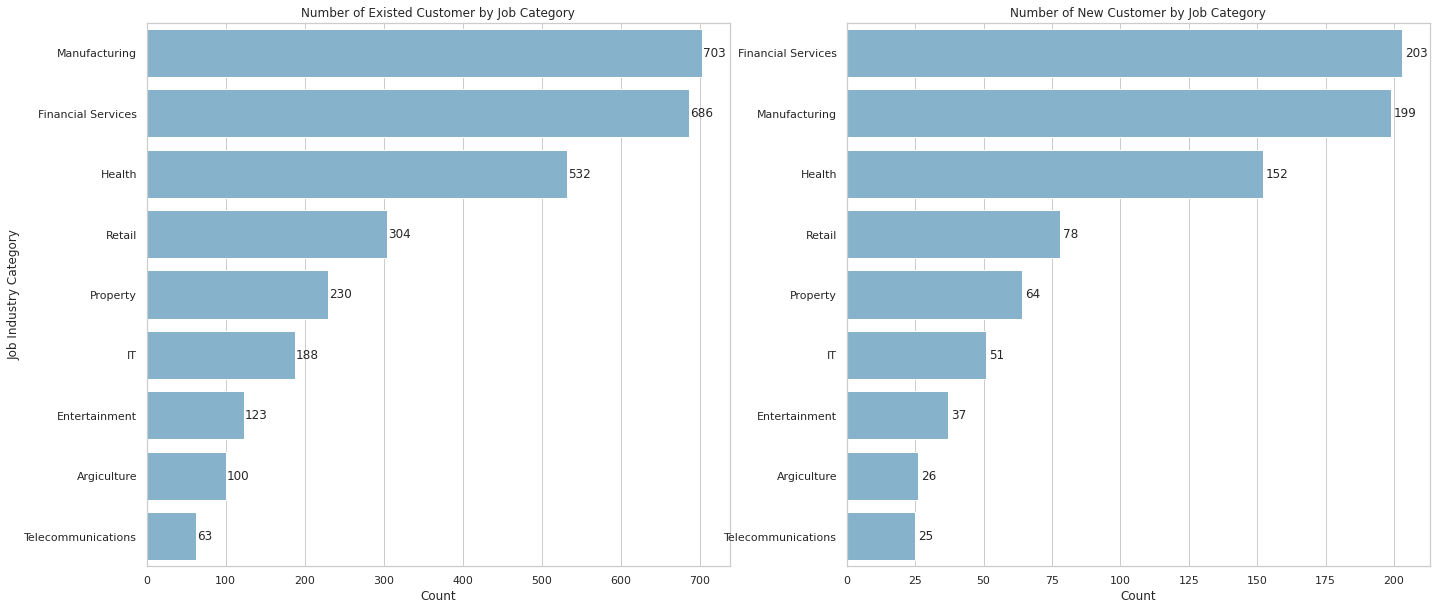

In [33]:
plt.figure(figsize = (23, 10))
# first plot
plt.subplot(121)

temp = customer\
.groupby('job_industry_category')\
.size()\
.to_frame('size')\
.sort_values(['size'], ascending=False)\
.reset_index()

g = sns.barplot(y = 'job_industry_category', x = 'size', data = temp, color = c);

for i in range(9):
    count = temp['size'][i]
    pct_string = '{:d}'.format(count)
    plt.text(count + 1, i, pct_string, va='center')
g.set(ylabel = 'Job Industry Category', xlabel = 'Count', title = 'Number of Existed Customer by Job Category') ;  


# second plot
plt.subplot(122)

temp = newCustomer\
.groupby('job_industry_category')\
.size()\
.to_frame('size')\
.sort_values(['size'], ascending=False)\
.reset_index()

g = sns.barplot(y = 'job_industry_category', x = 'size', data = temp, color = c);

for i in range(9):
    count = temp['size'][i]
    pct_string = '{:d}'.format(count)
    plt.text(count + 1, i, pct_string, va='center')
g.set(ylabel = '', xlabel = 'Count', title = 'Number of New Customer by Job Category') ;  

Among the Existed Customers, the top 1 job industry is Manufacturing and top 2 is Financial Services. Mostly our new customers are still in Fiancial Service and Our Manufacturing is on the second place.

The rest industries are stay on the same order. 



In [34]:


temp = customer.groupby(['bigger_age_group', 'wealth_segment']).size().to_frame('size').unstack()
temp = temp.drop('nan')
temp = temp.fillna(0)

temp['size', 'sum'] = temp['size'].sum(axis = 1)

temp = temp['size']


temp1 = newCustomer.groupby(['bigger_age_group', 'wealth_segment']).size().to_frame('size').unstack()
temp1 = temp1.drop('nan')
temp1 = temp1.fillna(0)

temp1['size', 'sum'] = temp1['size'].sum(axis = 1)

temp1 = temp1['size']

temp1

wealth_segment,Affluent Customer,High Net Worth,Mass Customer,sum
bigger_age_group,,,,
"(10, 30]",52,43,81,176
"(30, 50]",75,86,172,333
"(50, 70]",80,89,174,343
"(70, 90]",28,31,72,131


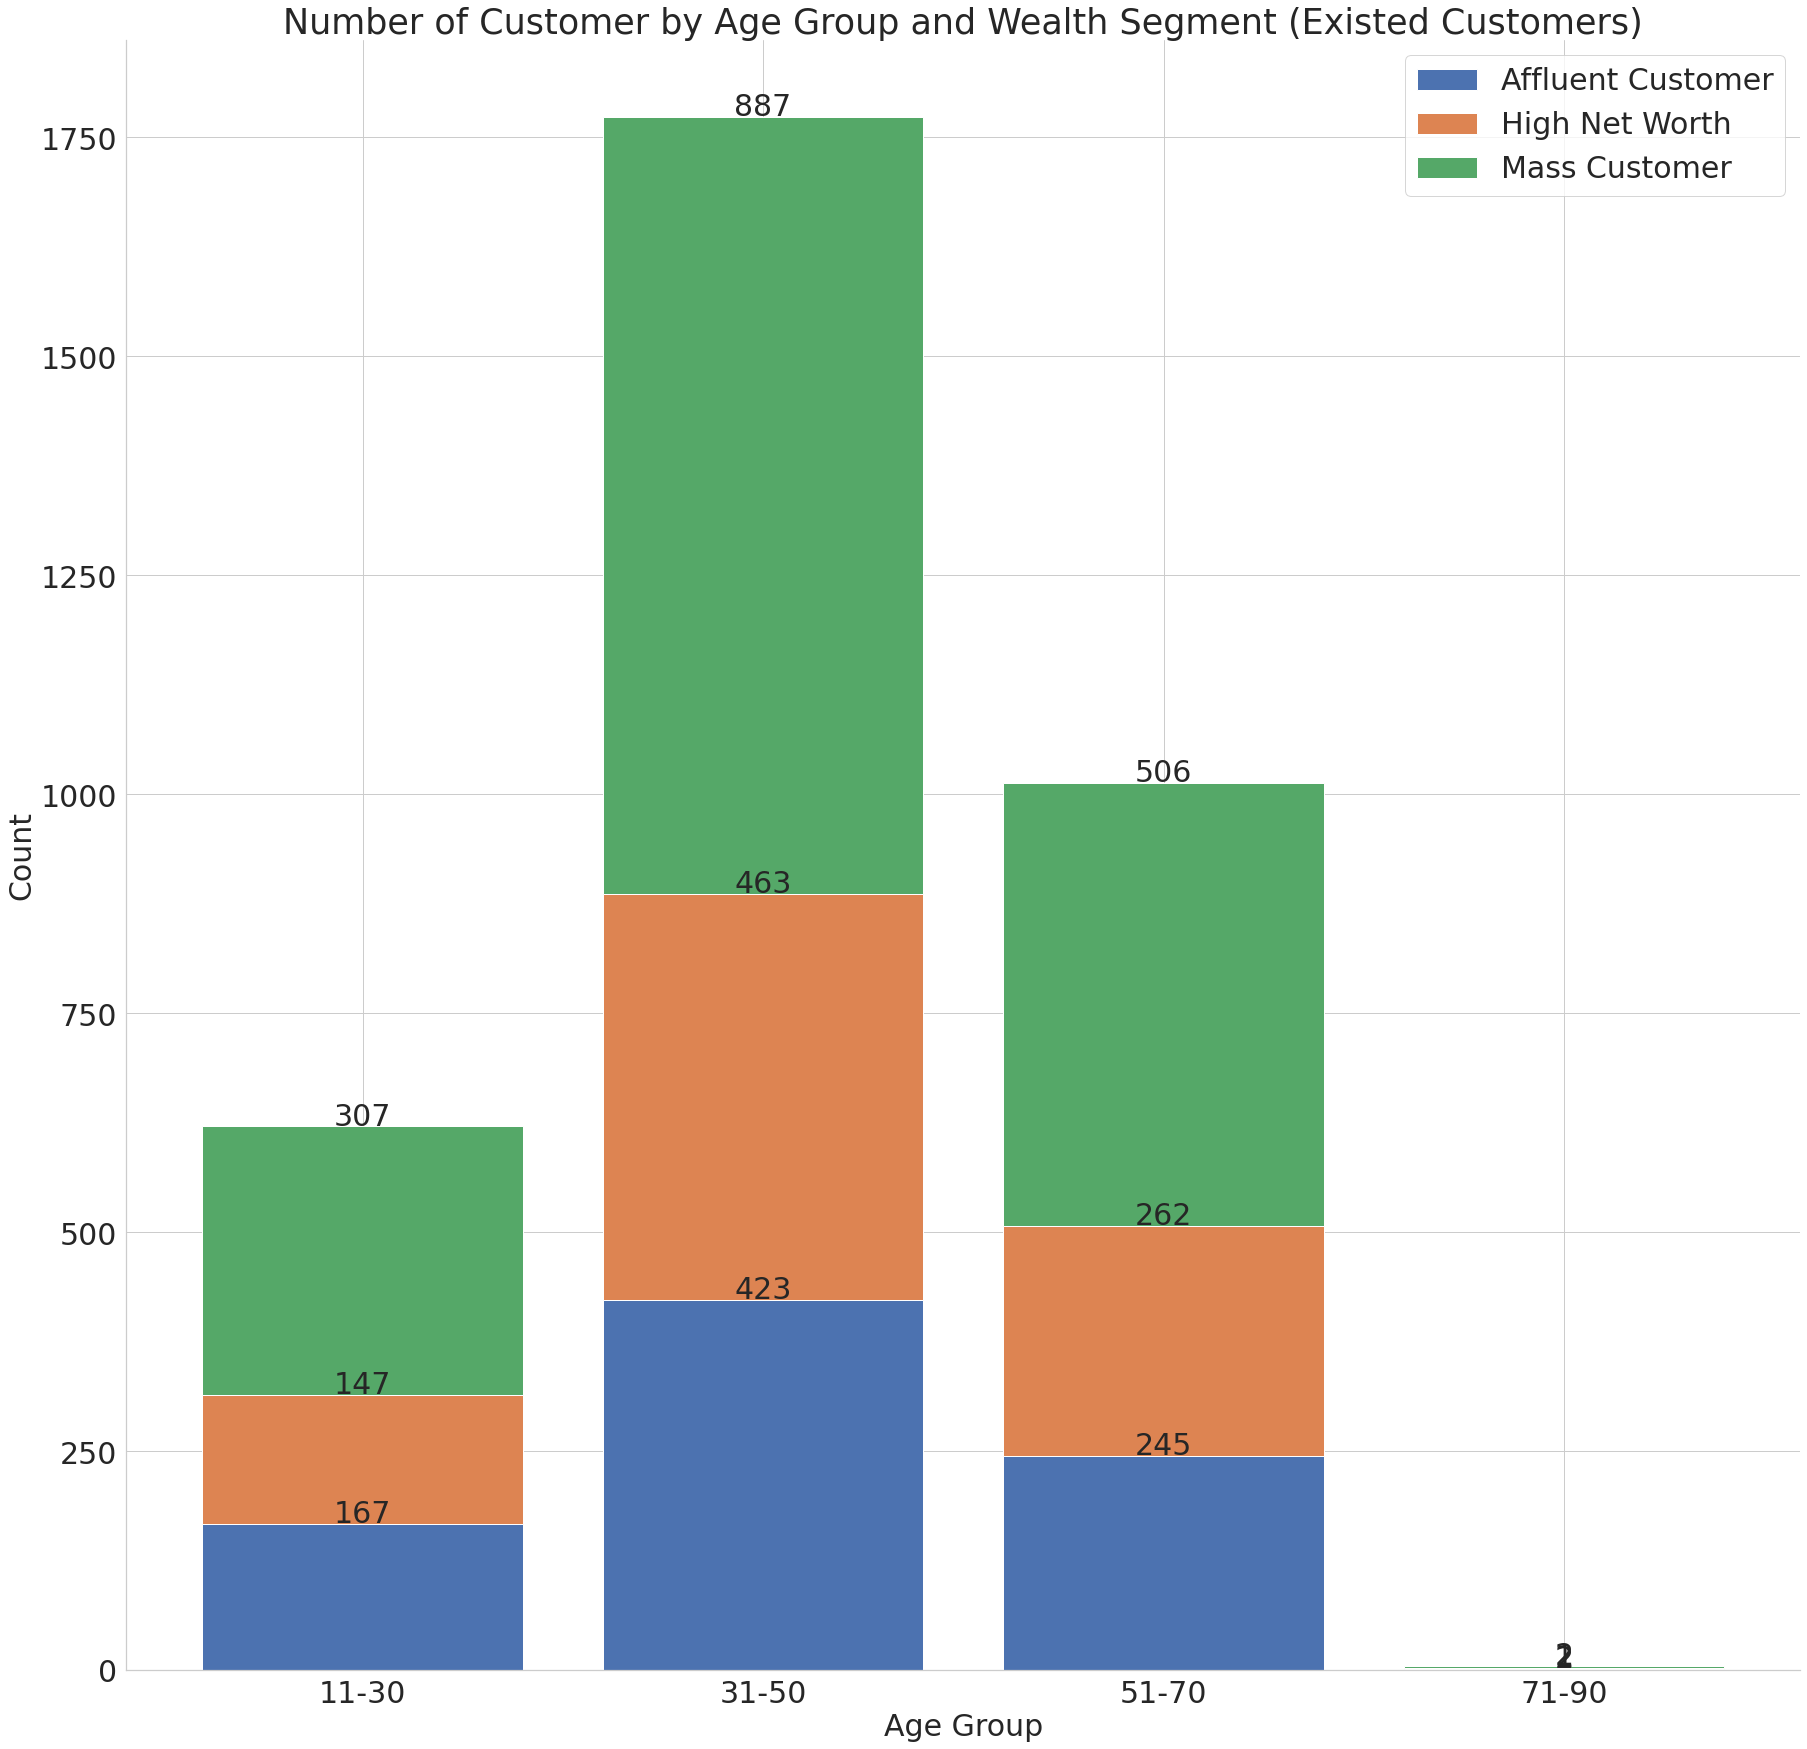

In [35]:
fig, ax = plt.subplots(figsize = (30, 30))


# First Plot

ax.bar(temp.index, temp['Affluent Customer'], label = 'Affluent Customer');
ax.bar(temp.index, temp['High Net Worth'], bottom=temp['Affluent Customer'],
       label='High Net Worth')

ax.bar(temp.index, temp['Mass Customer'], bottom=temp['High Net Worth'] + temp['Affluent Customer'],
       label='Mass Customer')

ax.set_xticks(range(len(temp))); # <--- set the ticks first
ax.set_xticklabels(['11-30', '31-50', '51-70', '71-90']);
#plt.xticks(rotation = 0);

# -------------------------stack annotation---------------------------------------
x = []
y = []
width = []
height = []
value = []
for i in range(len(ax.patches)):
    if i <= 3:
        x.append(ax.patches[i].get_x())
        y.append(ax.patches[i].get_y())
        width.append(ax.patches[i].get_width())
        height.append(ax.patches[i].get_height())
        value.append(ax.patches[i].get_height())
    elif i <= 7:
            x.append(ax.patches[i].get_x())
            y.append(ax.patches[i].get_y())
            width.append(ax.patches[i].get_width())
            height.append(ax.patches[i].get_height() + ax.patches[i-4].get_height())
            value.append(ax.patches[i].get_height())
    else:
        x.append(ax.patches[i].get_x())
        y.append(ax.patches[i].get_y())
        width.append(ax.patches[i].get_width())
        height.append(ax.patches[i].get_height() + ax.patches[i-4].get_height() + ax.patches[i-8].get_height())
        value.append(ax.patches[i].get_height())
        
annotation = pd.DataFrame({'x': x, 'y': y, 'width': width, 'height': height, 'value': value})
# ---------------------------------------------------------------------------------

# add annotation
for i, row in annotation.iterrows():
    ax.annotate(s=int(row.value),
                xy=(row.x+row.width/2., row.height),
                ha='center',
                va='center',
                xytext=(0, 10),
                textcoords='offset points',
               fontsize=30)
plt.xticks(fontsize= 30)
plt.yticks(fontsize= 30)
plt.xlabel('Age Group', fontsize = 30)
plt.ylabel('Count', fontsize = 30)
plt.title('Number of Customer by Age Group and Wealth Segment (Existed Customers)', fontsize = 35)
ax.legend(fontsize = 30)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)






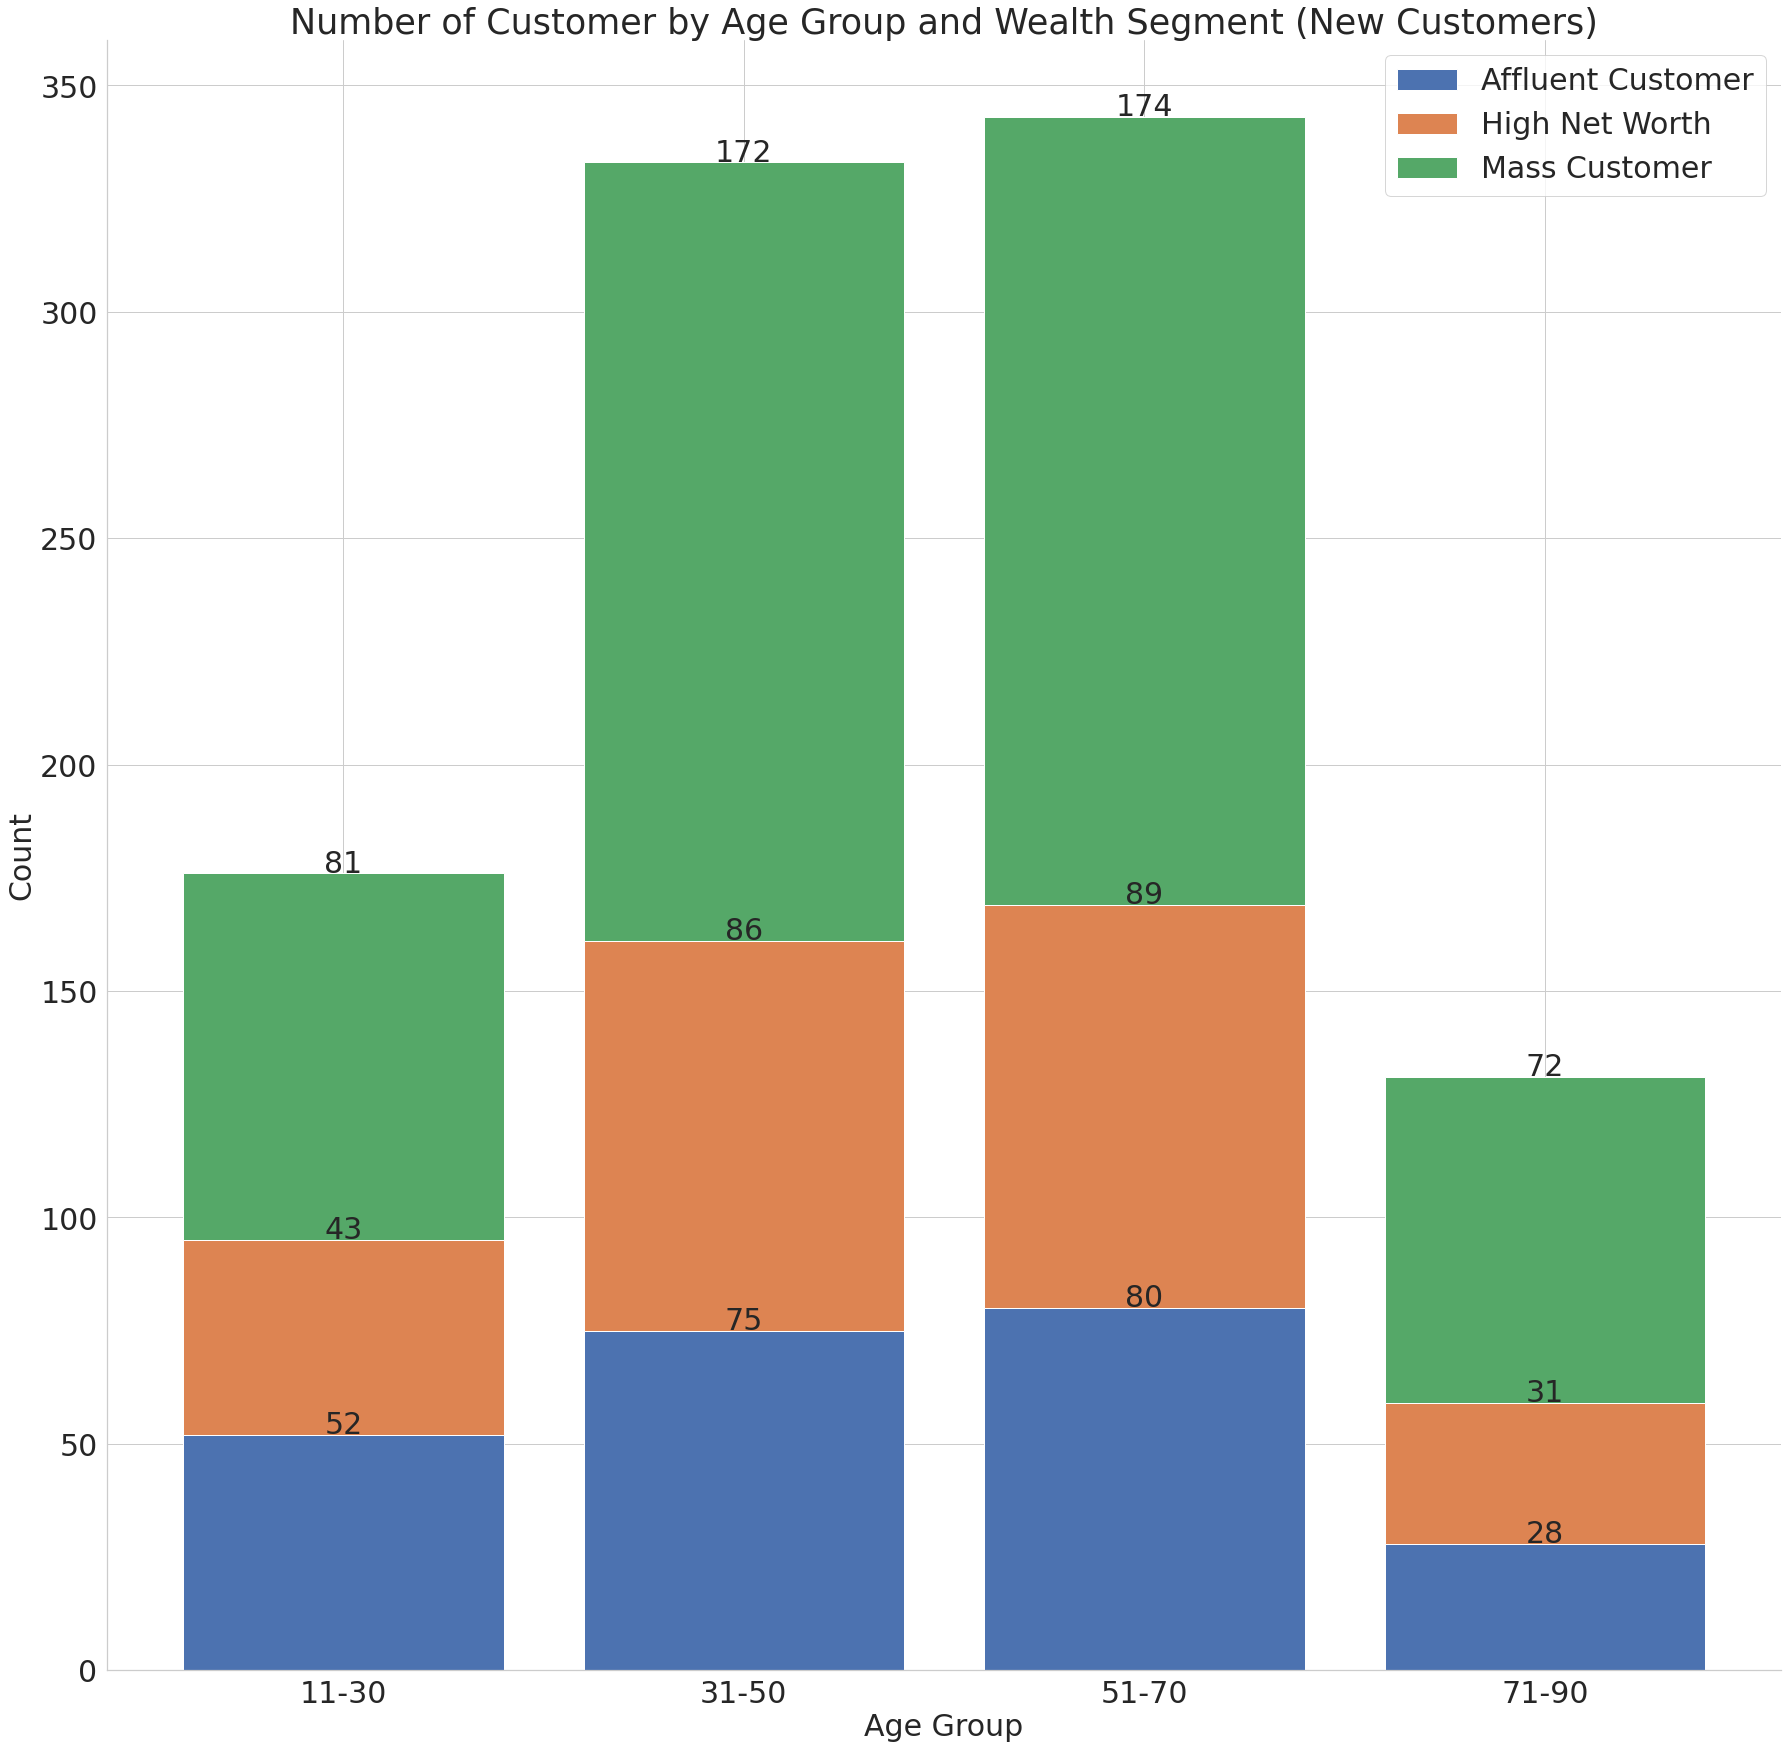

In [36]:
fig, ax = plt.subplots(figsize = (30, 30))

# Second Plot

ax.bar(temp1.index, temp1['Affluent Customer'], label = 'Affluent Customer');
ax.bar(temp1.index, temp1['High Net Worth'], bottom=temp1['Affluent Customer'],
       label='High Net Worth')

ax.bar(temp1.index, temp1['Mass Customer'], bottom=temp1['High Net Worth'] + temp1['Affluent Customer'],
       label='Mass Customer')

ax.set_xticks(range(len(temp1))); # <--- set the ticks first
ax.set_xticklabels(['11-30', '31-50', '51-70', '71-90']);
#plt.xticks(rotation = 0);

# -------------------------stack annotation---------------------------------------
x = []
y = []
width = []
height = []
value = []
for i in range(len(ax.patches)):
    if i <= 3:
        x.append(ax.patches[i].get_x())
        y.append(ax.patches[i].get_y())
        width.append(ax.patches[i].get_width())
        height.append(ax.patches[i].get_height())
        value.append(ax.patches[i].get_height())
    elif i <= 7:
            x.append(ax.patches[i].get_x())
            y.append(ax.patches[i].get_y())
            width.append(ax.patches[i].get_width())
            height.append(ax.patches[i].get_height() + ax.patches[i-4].get_height())
            value.append(ax.patches[i].get_height())
    else:
        x.append(ax.patches[i].get_x())
        y.append(ax.patches[i].get_y())
        width.append(ax.patches[i].get_width())
        height.append(ax.patches[i].get_height() + ax.patches[i-4].get_height() + ax.patches[i-8].get_height())
        value.append(ax.patches[i].get_height())
        
annotation = pd.DataFrame({'x': x, 'y': y, 'width': width, 'height': height, 'value': value})
# ---------------------------------------------------------------------------------

# add annotation
for i, row in annotation.iterrows():
    ax.annotate(s=int(row.value),
                xy=(row.x+row.width/2., row.height),
                ha='center',
                va='center',
                xytext=(0, 10),
                textcoords='offset points',
               fontsize=30)
plt.xticks(fontsize= 30)
plt.yticks(fontsize= 30)
plt.xlabel('Age Group', fontsize = 30)
plt.ylabel('Count', fontsize = 30)
plt.title('Number of Customer by Age Group and Wealth Segment (New Customers)', fontsize = 35)
ax.legend(fontsize = 30)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)



### plot Owns Car

In [37]:
print(newCustomer.owns_car.value_counts())
print(customer.owns_car.value_counts())
customer.head()

No     507
Yes    493
Name: owns_car, dtype: int64
Yes    1767
No     1722
Name: owns_car, dtype: int64


,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,address,postcode,state,country,property_valuation,size,margin,age,age_group,bigger_age_group
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0,060 Morning Avenue,2016,NSW,Australia,10,11,274.371818,68.0,"(59, 69]","(50, 70]"
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0,6 Meadow Vale Court,2153,NSW,Australia,10,3,742.086667,41.0,"(39, 49]","(30, 50]"
2,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0,0 Holy Cross Court,4211,QLD,Australia,9,2,110.285000,60.0,"(59, 69]","(50, 70]"
3,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0,17979 Del Mar Point,2448,NSW,Australia,4,6,399.156667,44.0,"(39, 49]","(30, 50]"
4,6,Curr,Duckhouse,Male,35,1966-09-16,NaN,Retail,High Net Worth,N,ðµ ð ð ð,Yes,13.0,9 Oakridge Court,3216,VIC,Australia,9,5,789.310000,55.0,"(49, 59]","(50, 70]"


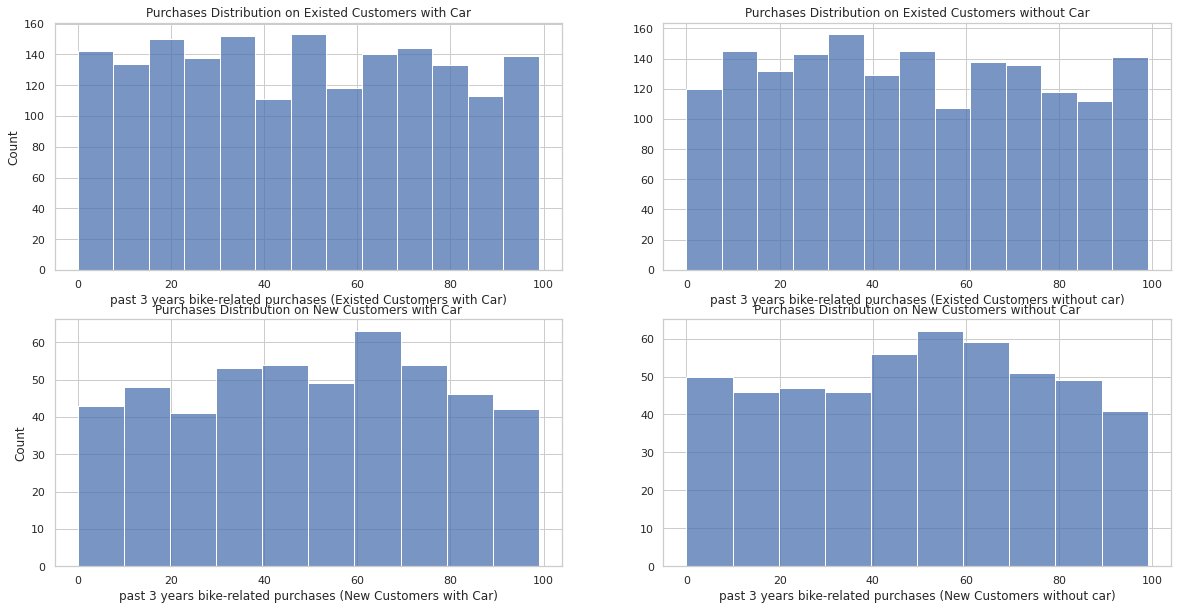

In [38]:
oldCustomer_car = customer[customer.owns_car == 'Yes']['past_3_years_bike_related_purchases']
oldCustomer_nocar = customer[customer.owns_car == 'No']['past_3_years_bike_related_purchases']

newCustomer_car = newCustomer[newCustomer.owns_car == 'Yes']['past_3_years_bike_related_purchases']
newCustomer_nocar = newCustomer[newCustomer.owns_car == 'No']['past_3_years_bike_related_purchases']

plt.figure(figsize = (20, 10))
plt.subplot(221)
g = sns.histplot(oldCustomer_car);
g.set(xlabel = 'past 3 years bike-related purchases (Existed Customers with Car)', ylabel = 'Count', title = 'Purchases Distribution on Existed Customers with Car');

plt.subplot(222)
g = sns.histplot(oldCustomer_nocar);
g.set(xlabel = 'past 3 years bike-related purchases (Existed Customers without car)', ylabel = '', title = 'Purchases Distribution on Existed Customers without Car');


plt.subplot(223)
g = sns.histplot(newCustomer_car);
g.set(xlabel = 'past 3 years bike-related purchases (New Customers with Car)', ylabel = 'Count', title = 'Purchases Distribution on New Customers with Car');

plt.subplot(224)
g = sns.histplot(newCustomer_nocar);
g.set(xlabel = 'past 3 years bike-related purchases (New Customers without car)', ylabel = '', title = 'Purchases Distribution on New Customers without Car');


In [39]:
sm.stats.ttest_ind(oldCustomer_car, oldCustomer_nocar)

(-0.11410151885421173, 0.9091638871444725, 3487.0)

In [40]:
sm.stats.ttest_ind(newCustomer_car, newCustomer_nocar)

(0.2657746670166247, 0.790467646539127, 998.0)

## Car Ownership by Stats

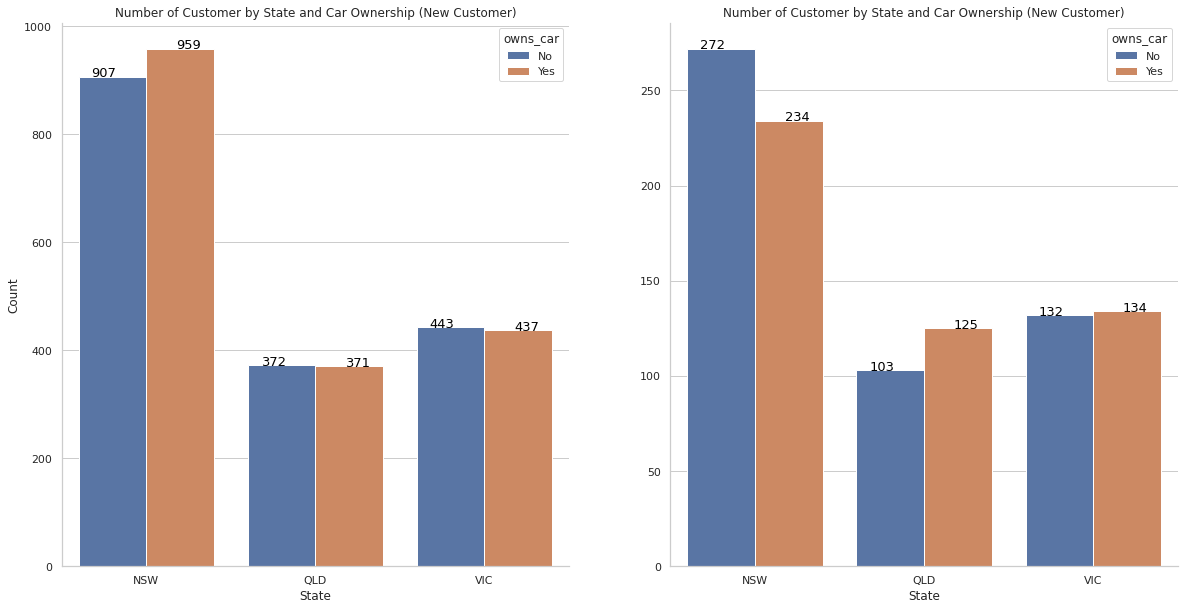

In [41]:
plt.figure(figsize = (20, 10))

# first plot
plt.subplot(121)

temp = customer.groupby(['state', 'owns_car']).size().to_frame('size').reset_index()

g = sns.barplot(x="state", y="size", hue="owns_car", data=temp)

for index, row in temp.iterrows():
    g.text(index/2 - 0.25, row['size'], str(round(row['size'])), color='black', ha="center", fontsize=13);
g.set(xlabel='State',ylabel = 'Count', title = 'Number of Customer by State and Car Ownership (New Customer)') ;



# second plot
plt.subplot(122)

temp = newCustomer.groupby(['state', 'owns_car']).size().to_frame('size').reset_index()

g = sns.barplot(x="state", y="size", hue="owns_car", data=temp)

for index, row in temp.iterrows():
    g.text(index/2 - 0.25, row['size'], str(round(row['size'])), color='black', ha="center", fontsize=13);
g.set(xlabel='State',ylabel = '', title = 'Number of Customer by State and Car Ownership (New Customer)') ;


sns.despine();    
